In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_context("paper")

In [3]:
orisigm = np.load('orisigm.npy')
testsigm = np.load('testsigm.npy')
trainsigm = np.load('trainsigm.npy')

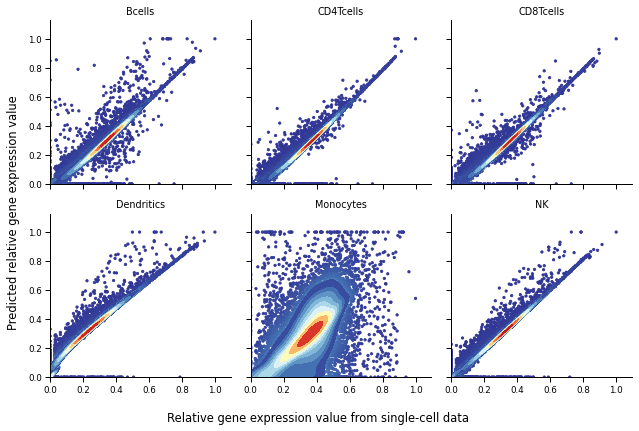

In [4]:
fig, axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(9, 6))
names=['Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK']
for i in range(6):
    values = np.vstack([orisigm[i,:], testsigm[i,:]])
    kernel = stats.gaussian_kde(values)(values)
    axes[i//3,i%3].scatter(x=orisigm[i,:],y=testsigm[i,:],cmap="RdYlBu_r",c=kernel,marker='.')
    sns.kdeplot(x=orisigm[i,:],y=testsigm[i,:],fill=True,thresh=0.2, cmap="RdYlBu_r",ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(names[i])
    axes[i//3,i%3].spines['top'].set_visible(False)
    axes[i//3,i%3].spines['right'].set_visible(False)
plt.xlim(0,)
plt.ylim(0,)
fig.supxlabel('Relative gene expression value from single-cell data')
fig.supylabel('Predicted relative gene expression value')
plt.tight_layout()
fig.savefig('concordance.eps', format='eps', dpi=300)
plt.show()